# TO BE UPDATED: NYC Taxi Trip Records Analysis Using Machine Learning algrithms

“Cities are not born smart. They become smart by understanding what is happening on their streets.” – New York City Taxi and Limousine Commission (TLC).

TLC is an agency of the New York City government that licenses and regulates the medallion taxis and for-hire vehicle industries, including app-based companies. Therefore, major trends in the taxi and for-hire vehicle industry are highlighted in TLC records and they are public available.

* What transportation data does TLC collect?

* Why collects data?

To understand traffic patterns, working conditions, vehicle efficiency, service availability, distinguish new business opportunities… 


## 1) About the data

* The data set is publically available for free on NYC.gov
* I was living in NYC for some time during my internship and visited for a few times, and took taxi for sure. However, I never think about Taxi in terms of Trip Records. The research is interesting to me and I would like to introduce the result to my NYC friends next time.
* The data set is huge:
    - It has 1404726 rows and 21 columns, including all of the information about Taxi

## 2) Link to the data set
* NYC Taxi Limousine trip record data URL: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* To download the data set: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-06.csv

In [1]:
# Enter link here.
nyc_gov_link = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
green_tripdata_download = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-06.csv"

## 3) Import the data
List the total rows and columns

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import os
from scipy import stats
import matplotlib.pyplot as plt

# The dateset is 59MB, I downloaded to my local laptop to speed up.
url = "/Users/Jingwen/Desktop/bioinfo-ML/green_tripdata_2016-06.csv"
#url = "/Users/Jingwen/Desktop/bioinfo-ML/green_tripdata_2015-09.csv"


data = pd.read_csv(url)

# Report how many rows and columns of data you have loaded.
print("There are",data.shape[0],"rows and",data.shape[1],"columns.")

There are 1494926 rows and 21 columns.


## 4) Show the head of the data set

In [3]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


## 5) Show me the shape of your data
* Size of the Data Set
* Shape of the Data Set
* Data Types of the Data Set

In [4]:
# data.size 
size = data.size 
  
# data.shape 
shape = data.shape 
  
# printing size and shape 
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}\n". 
      format(size, shape, shape[0]*shape[1])) 

# data.dtypes
dtypes = data.dtypes
print("data types\n{}\n". 
      format(dtypes))

Size = 31393446
Shape =(1494926, 21)
Shape[0] x Shape[1] = 31393446

data types
VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object



In [5]:
data_pie_percentage = data.groupby('Passenger_count').count()['VendorID']
print(data_pie_percentage)

Passenger_count
0        440
1    1255832
2     115014
3      33812
4       9769
5      57907
6      22091
7         15
8         30
9         16
Name: VendorID, dtype: int64


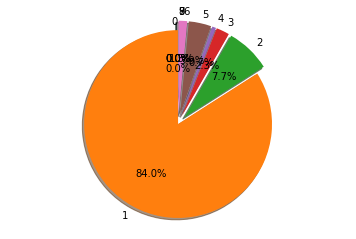

In [6]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_percentage
explode = (0, 0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
data_pie_total_amount = data.groupby('Passenger_count').mean()['Fare_amount']

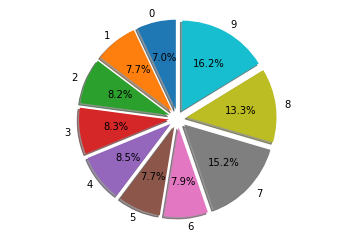

In [8]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_total_amount
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
data_pie_trip_distance = data.groupby('Passenger_count').mean()['Trip_distance']

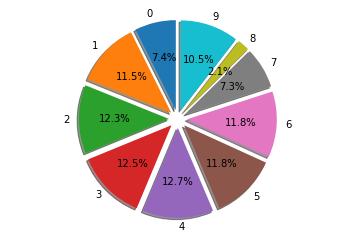

In [10]:
labels = [0,1,2,3,4,5,6,7,8,9]
sizes = data_pie_trip_distance
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 6) Show me the proportion of missing observations for each column of your data

In [11]:
print(data_pie_percentage[0]/data_pie_percentage.sum())

0.0002943289500617422


## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

#### Project goal: Predict tips amount using other features of the trips.

#### Project outline:
* Summarize the characteristics of the trips; explore traffic patterns
   - Distance by pickup/drop-off time: any difference in morning/evening peak?
   - Traffic flow by county
* Develop supervised model to predict the tips amount using other features of the trip.	
   - Data Cleaning
   - Feature engineering
   - Exploratory analysis
   - Modeling
   - Evaluation
* Visualize the results of finding
   - by map


## 8) What is your _y_-variable?

The independent variable will be tip amount. Histogram below shows the distribution of the tip amount variable.


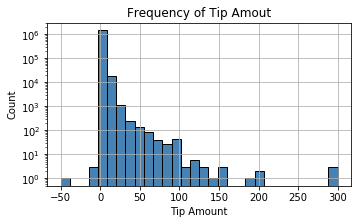

In [12]:
plt.figure(1, figsize=(12, 3))

def plotHistogram(data):
    plt.subplot(121)
    plt.hist(data.Tip_amount,
             bins=30,
             log=True,
             color='steelblue',
             edgecolor='k',)
    plt.xlabel('Tip Amount')
    plt.ylabel('Count')
    plt.grid(True)
    plt.title('Frequency of Tip Amout')

plotHistogram(data)

plt.show() 

In [13]:
# data cleaning

from datetime import timedelta
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def clean(data):   
    # remove obs with negative tip amount and total fare amount less than 2.5
    data = data[(data.Total_amount>=2.5)]
    
    # remove value with negative value 
    data =  data[(data.Tip_amount>=0) & 
                 (data.Fare_amount>=0) & 
                 (data.improvement_surcharge>=0) &
                 (data.Tolls_amount>=0) & 
                 (data.Extra>=0) & 
                 (data.MTA_tax>=0)]
    
    # encoding
    print(data.select_dtypes(include=['O']).columns)
    data['Store_and_fwd_flag'] = np.where((data.Store_and_fwd_flag=='Y'),1,0)
    
    # missing detect
    #print(data.isnull().sum())
    
    # drop column of NAs
    data = data.drop(columns=['Ehail_fee'],axis=1)
    
    return(data)


data_clean = clean(data)
data_clean.head()

Index(['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Store_and_fwd_flag'], dtype='object')


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,0,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,0,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,0,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,0,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,0,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0


In [14]:
# Feature engineering

def features(data):
    
    # create a variable describe Trip time
    data['pickup_time'] = data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
    data['dropoff_time'] = data.Lpep_dropoff_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

    data['trip_time'] = (data['dropoff_time'] - data['pickup_time']) / timedelta(minutes=1)
    
    # week day
    data['pickup_day'] = data.lpep_pickup_datetime.apply(lambda x:dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").strftime('%w'))
    
    # create a variable represent average speed
    data['avg_speed'] = round(data.Trip_distance/data.trip_time,2)
    data['avg_speed'] = data['avg_speed'].replace([np.inf, -np.inf], np.nan)
    data['avg_speed'].fillna((data['avg_speed'].mean()), inplace=True)

    return(data)    
    
f_data = features(data_clean)
f_data.head()



,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup_time,dropoff_time,trip_time,pickup_day,avg_speed
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,0,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0.0,0.0,9.75,1,2.0,2015-09-01 00:02:38,2015-09-01 00:02:38,0.0,2,NaN
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,0,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,0.0,45.00,1,2.0,2015-09-01 00:04:24,2015-09-01 00:04:24,0.0,2,NaN
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,0,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.0,0.3,5.80,1,1.0,2015-09-01 00:04:24,2015-09-01 00:04:24,0.0,2,NaN
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,0,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.0,0.3,6.30,2,1.0,2015-09-01 00:06:42,2015-09-01 00:06:42,0.0,2,NaN
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,0,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.0,0.3,6.30,2,1.0,2015-09-01 00:04:20,2015-09-01 00:04:20,0.0,2,NaN


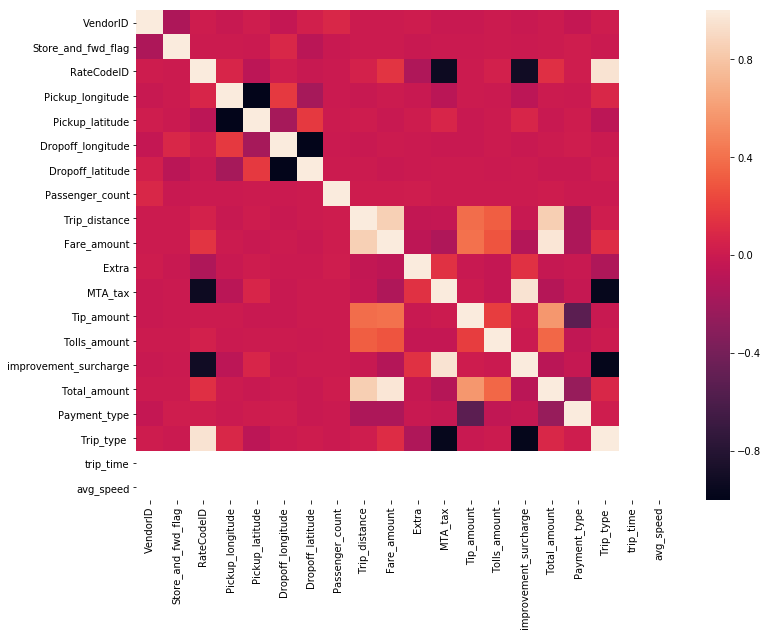

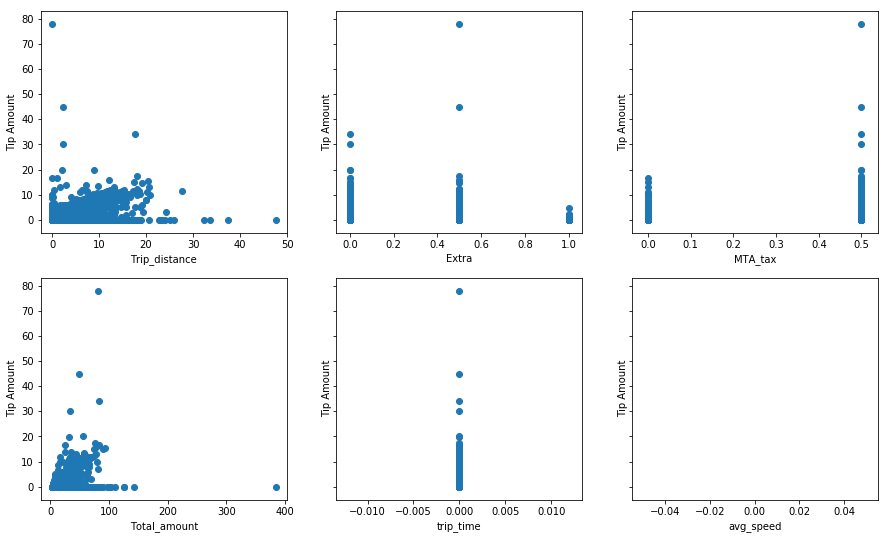

In [15]:
# Heat map
# Scatter plot
def exploratary(data):
    data_clean.corr()
    plt.figure(figsize = (12,9))
    ax=sns.heatmap(data.corr())

    var_list = [['Trip_distance','Extra', 'MTA_tax'],
                ['Total_amount','trip_time','avg_speed']]

    data_pattern = data_clean.head(10000)
    fig, ax = plt.subplots(len(var_list),len(var_list[0]),figsize=(15,9),sharey=True)
    for i in range(len(var_list)): 
        for j in range(len(var_list[i])):      
            ax[i,j].scatter(data_pattern[var_list[i][j]], data_pattern['Tip_amount'])
            ax[i,j].set_xlabel(var_list[i][j])
            ax[i,j].set_ylabel("Tip Amount")
            
            
exploratary(f_data)

In [16]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn import metrics 


import warnings
warnings.filterwarnings('ignore')

data_model = f_data.head(50000)

def randomforest(data):
    
    x = data[['Payment_type','Total_amount','trip_time','avg_speed',
              'Extra', 'Tolls_amount','improvement_surcharge','Passenger_count',
              ]]
    y = data[['Tip_amount']]

    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

    rf = RandomForestRegressor(n_estimators=100,oob_score=True, random_state=10)
    rf.fit(X_train, y_train.values.ravel())

    predicted_train = rf.predict(X_train)
    predicted_test = rf.predict(X_test)
    test_score = r2_score(y_test, predicted_test)

    print(f'Out-of-bag R2_score estimate: {rf.oob_score_:>5.3}')
    print(f'Test data R2_score: {test_score:>5.3}')
    
    #print("Processing time", dt.datetime.now()-tic)
    return rf.predict(x)
    
y_pred_rf = randomforest(data_model)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
f_data.head()